In [8]:
def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

Коэффиценты прямой: k, s_k, b, s_b
0.7399999999999999	0.01549193338483383	0.0009999999999999974	0.0002190890230021252
Коэффиценты прямой: k, s_k, b, s_b
1.3200000000000012	0.038987177379233705	-0.0016000000000000458	0.0005513619500835781


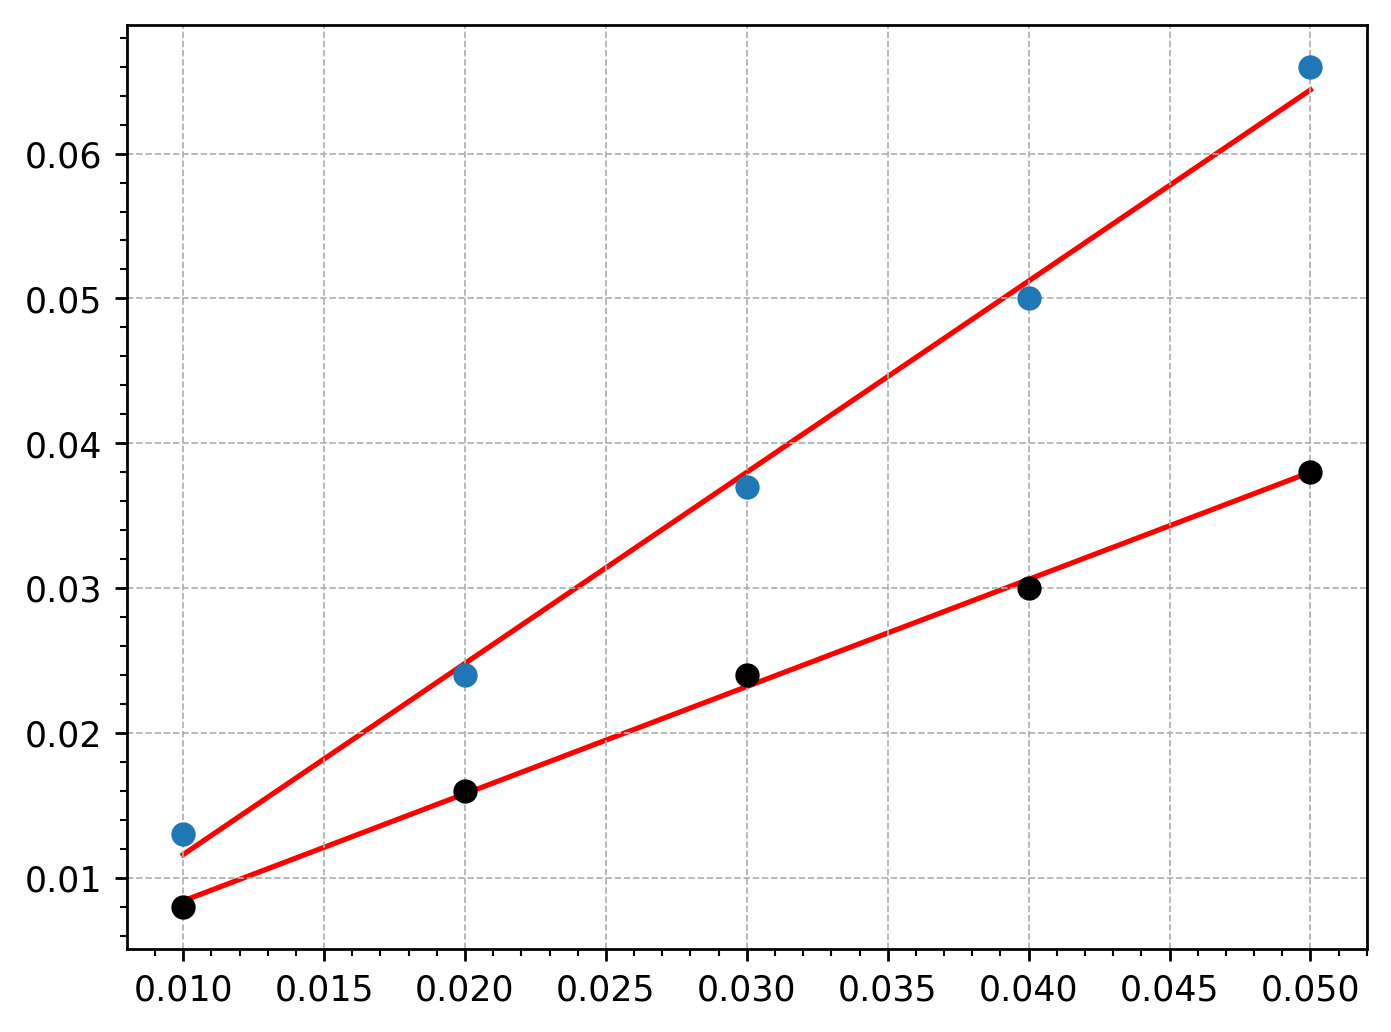

In [16]:
import numpy as np
import matplotlib.pyplot as plt

c = np.array( [0.01, 0.02, 0.03, 0.04, 0.05] )
v1 = np.array( [0.008, 0.016, 0.024, 0.030, 0.038] )
v2 = np.array( [0.013, 0.024, 0.037, 0.05, 0.066] )

fig, ax = plt.subplots(dpi=250)
ax.minorticks_on()
ax.grid(which='major', linestyle='--', linewidth=0.5, zorder=1)
ax.scatter(c, v1, zorder=3, color='k')
ax.scatter(c, v2, zorder=3)

(k, s_k, b, s_b) = lin_ls(c, v1, through_null=False)
ax.plot(c, c * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')
(k, s_k, b, s_b) = lin_ls(c, v2, through_null=False)
ax.plot(c, c * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')